In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import math

In [2]:
data = pd.read_excel("golden_scaled.xlsx")

In [3]:
data

chart="apps.cpu",family="cpu",dimension="apps.plugin"  \
0                                              0.006884       
1                                             -0.008489       
2                                             -0.000211       
3                                              0.004519       
4                                             -0.001731       
...                                                 ...       
9626                                          -1.687886       
9627                                           1.702331       
9628                                          -0.004603       
9629                                           0.012290       
9630                                           0.004350       

      chart="apps.cpu",family="cpu",dimension="cron"  \
0                                          -0.039891   
1                                          -0.039891   
2                                          -0.039891   
3                                          -0.039891   
4                                          -0.039891   
...                                              ...   
9626                                       -0.039891   
9627                                       -0.039891   
9628                                       -0.039891   
9629                                       -0.039891   
9630                                       -0.039891   

      chart="apps.cpu",family="cpu",dimension="go.d.plugin"  \
0                                             -0.178639       
1                                             -0.178639       
2                                             -0.178639       
3                                             -0.178639       
4                                             -0.178639       
...                                                 ...       
9626                                          -0.178639       
9627                                          -0.178639       
9628                                          -0.178639       
9629                                          -0.178639       
9630                                          -0.178639       

      chart="apps.cpu",family="cpu",dimension="kernel"  \
0                                             0.123063   
1                                             0.119083   
2                                             2.596980   
3                                            -1.124716   
4                                             0.122441   
...                                                ...   
9626                                          1.362385   
9627                                          0.121322   
9628                                          0.110998   
9629                                         -1.124716   
9630                                          1.367235   

      chart="apps.cpu",family="cpu",dimension="logs"  \
0                                          -0.041375   
1                                          -0.041375   
2                                          -0.041375   
3                                          -0.041375   
4                                          -0.041375   
...                                              ...   
9626                                       -0.041375   
9627                                       -0.041375   
9628                                       -0.041375   
9629                                       -0.041375   
9630                                       -0.041375   

      chart="apps.cpu",family="cpu",dimension="netdata"  \
0                                              1.549708   
1                                             -1.490891   
2                                              0.029790   
3                                              0.030552   
4                                              0.033143   
...                                                 ...   
9626                                

In [4]:
data.corr()

chart="apps.cpu",family="cpu",dimension="apps.plugin"  \
chart="apps.cpu",family="cpu",dimension="apps.p...                                           1.000000       
chart="apps.cpu",family="cpu",dimension="cron"                                               0.004404       
chart="apps.cpu",family="cpu",dimension="go.d.p...                                           0.000969       
chart="apps.cpu",family="cpu",dimension="kernel"                                             0.002803       
chart="apps.cpu",family="cpu",dimension="logs"                                              -0.004235       
...                                                                                               ...       
chart="users.threads",family="processes",dimens...                                           0.015145       
chart="users.threads",family="processes",dimens...                                           0.014626       
chart="users.threads",family="processes",dimens...                                           0.023141       
chart="users.vmem",family="mem",dimension="fields"                                           0.009955       
chart="users.vmem",family="mem",dimension="netd...                                           0.016045       

                                                    chart="apps.cpu",family="cpu",dimension="cron"  \
chart="apps.cpu",family="cpu",dimension="apps.p...                                        0.004404   
chart="apps.cpu",family="cpu",dimension="cron"                                            1.000000   
chart="apps.cpu",family="cpu",dimension="go.d.p...                                        0.007931   
chart="apps.cpu",family="cpu",dimension="kernel"                                          0.004514   
chart="apps.cpu",family="cpu",dimension="logs"                                            0.032367   
...                                                                                            ...   
chart="users.threads",family="processes",dimens...                                       -0.005416   
chart="users.threads",family="processes",dimens...                                        0.079755   
chart="users.threads",family="processes",dimens...                                       -0.008700   
chart="users.vmem",family="mem",dimension="fields"                                       -0.002202   
chart="users.vmem",family="mem",dimension="netd...                                        0.104841   

                                                    chart="apps.cpu",family="cpu",dimension="go.d.plugin"  \
chart="apps.cpu",family="cpu",dimension="apps.p...                                           0.000969       
chart="apps.cpu",family="cpu",dimension="cron"                                               0.007931       
chart="apps.cpu",family="cpu",dimension="go.d.p...                                           1.000000       
chart="apps.cpu",family="cpu",dimension="kernel"                                             0.003729       
chart="apps.cpu",family="cpu",dimension="logs"                                               0.020311       
...                                                                                               ...       
chart="users.threads",family="processes",dimens...                                           0.000936       
chart="users.threads",family="processes",dimens...                                           0.000153       
chart="users.threads",family="processes",dimens...                                           0.000509       
chart="users.vmem",family="mem",dimension="fields"                                          -0.004326       
chart="users.vmem",family="mem",dimension="netd...                                           0.000492       

                                                    chart="apps.cpu",family="cpu",dimension="kernel"  \
chart="apps.cpu",family="cpu",dimension="apps.p...                                          0.002803   
c

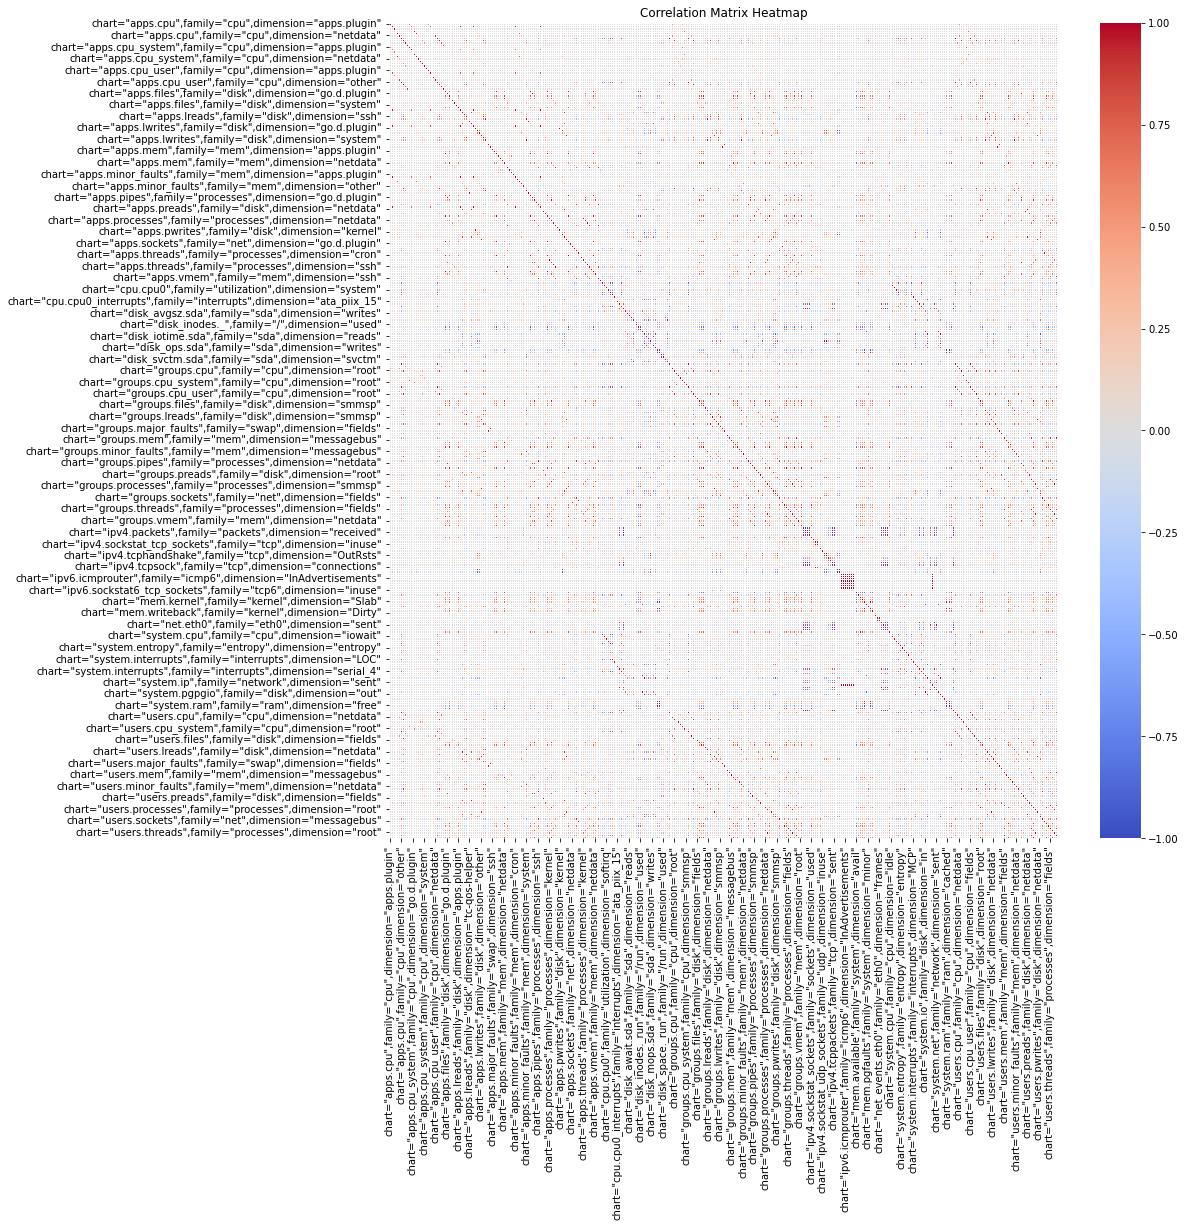

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [6]:
# Inicialize o modelo PCA com o número de componentes desejado (por exemplo, 2 componentes)
pca = PCA(n_components=18)
data_pca = pca.fit_transform(data)

In [7]:
# Obtenha os autovalores
eigenvalues = pca.explained_variance_

In [8]:
data_pca

array([[ 76.65635812,  26.20831186, -15.05507118, ...,   5.82159817,
          6.76428415,  10.19785322],
       [ 42.74020739,   9.10098644,  -4.23086504, ...,   0.25185892,
         -0.75723699,  -0.42921275],
       [ 28.73397591,   1.04415178,  -0.95903213, ..., -10.6604793 ,
         -8.10516103,  -6.11120377],
       ...,
       [ -5.3852094 ,   7.54451001,  -3.19183273, ...,  -4.74134402,
          1.25217549,  -0.85374729],
       [ 15.85492099,  17.68355521, -11.43465074, ...,  -5.85406185,
          1.15359913,   2.27793741],
       [ 20.04359627,  19.46784462, -11.32324434, ...,  -1.56596623,
          0.36920877,   1.44422214]])

In [9]:
s = np.diag(pca.explained_variance_)

In [10]:
T2_statistic = np.sum((data_pca / np.sqrt(pca.explained_variance_))**2, axis=1)

In [11]:
T2_statistic

array([305.73340146, 226.14771778, 498.86012582, ...,  11.13222459,
       184.72148708, 164.95847116])

In [12]:
from scipy.stats import f, chi2, beta

In [13]:
reconstructed_matrix = pca.inverse_transform(data_pca)
e = data - reconstructed_matrix

e_obs = np.sum(e**2, axis=1)

In [14]:
def get_ucl(alpha, t2, errors):
    
    mean_t2 = np.mean(t2)
    std_t2 = np.std(t2)
    
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    
    g_t2 = (std_t2**2)/(2*mean_t2)
    h_t2 = (2*(mean_t2**2))/std_t2**2
    
    g_error = (std_error**2)/(2*mean_error)
    h_error = (2*(mean_error**2))/std_error**2
        
    ucl_t2 = g_t2 * chi2.ppf(1-alpha, df=h_t2)
    ucl_error = g_error * chi2.ppf(1-alpha, df=h_error)
    
    return ucl_t2, ucl_error

In [23]:
ucl_t2, ucl_e = get_ucl(0.001, T2_statistic, e_obs)

ucl_t2, ucl_e

(812.1587363048071, 5625.8743529642325)

In [24]:
aa = []
bb = []

for i in range(len(T2_statistic)):
    if T2_statistic[i] < ucl_t2:
        aa.append(T2_statistic[i])
    else:
        bb.append(T2_statistic[i])
        
print(len(aa), len(bb))

9620 11


In [25]:
aa = []
bb = []

for i in range(len(e_obs)):
    if e_obs[i] < ucl_e:
        aa.append(e_obs[i])
    else:
        bb.append(i)
        
print(len(aa), len(bb))

9620 11


In [29]:
import plotly.graph_objects as go
import numpy as np

x = np.array(range(len(T2_statistic)))

# Create a scatter plot for data points
scatter = go.Scatter(x=x, y=T2_statistic, showlegend=False, mode='markers')

# Create red lines for upper and lower limits
upper_limit_line = go.Scatter(x=x, y=[ucl_t2] * len(x), mode='lines', showlegend=False, line=dict(color='red', dash='dash'))
lower_limit_line = go.Scatter(x=x, y=[0] * len(x), mode='lines', showlegend=False, line=dict(color='red', dash='dash'))

# Create layout with labels and title
layout = go.Layout(
    title='Carta de controlo T2 para a fase 1',
    plot_bgcolor='rgba(0,0,0,0)',  # Set background color to transparent
    xaxis=dict(title='Observação'),
    yaxis=dict(title='T2'),
)

# Combine the data and layout into a figure
fig = go.Figure(data=[scatter, upper_limit_line, lower_limit_line], layout=layout)

# Show the plot
fig.show()


In [32]:
import plotly.graph_objects as go
import numpy as np

x = np.array(range(len(e_obs)))

# Create a scatter plot for data points
scatter = go.Scatter(x=x, y=e_obs, showlegend=False, mode='markers')

# Create red lines for upper and lower limits
upper_limit_line = go.Scatter(x=x, y=[ucl_e] * len(x), mode='lines', showlegend=False, line=dict(color='red', dash='dash'))
lower_limit_line = go.Scatter(x=x, y=[0] * len(x), mode='lines', showlegend=False, line=dict(color='red', dash='dash'))

# Create layout with labels and title
layout = go.Layout(
    title='Carta de controlo para o erro para a fase 1',
    plot_bgcolor='rgba(0,0,0,0)',  # Set background color to transparent
    xaxis=dict(title='Observação'),
    yaxis=dict(title='Erro'),
)

# Combine the data and layout into a figure
fig = go.Figure(data=[scatter, upper_limit_line, lower_limit_line], layout=layout)

# Show the plot
fig.show()


# Fase 2

In [33]:
cols_kept_pre_processing = ['chart="apps.cpu",family="cpu",dimension="apps.plugin"',
'chart="apps.cpu",family="cpu",dimension="cron"',
'chart="apps.cpu",family="cpu",dimension="go.d.plugin"',
'chart="apps.cpu",family="cpu",dimension="kernel"',
'chart="apps.cpu",family="cpu",dimension="logs"',
'chart="apps.cpu",family="cpu",dimension="netdata"',
'chart="apps.cpu",family="cpu",dimension="other"',
'chart="apps.cpu",family="cpu",dimension="ssh"',
'chart="apps.cpu",family="cpu",dimension="system"',
'chart="apps.cpu",family="cpu",dimension="tc-qos-helper"',
'chart="apps.cpu_system",family="cpu",dimension="apps.plugin"',
'chart="apps.cpu_system",family="cpu",dimension="cron"',
'chart="apps.cpu_system",family="cpu",dimension="go.d.plugin"',
'chart="apps.cpu_system",family="cpu",dimension="kernel"',
'chart="apps.cpu_system",family="cpu",dimension="logs"',
'chart="apps.cpu_system",family="cpu",dimension="netdata"',
'chart="apps.cpu_system",family="cpu",dimension="other"',
'chart="apps.cpu_system",family="cpu",dimension="ssh"',
'chart="apps.cpu_system",family="cpu",dimension="system"',
'chart="apps.cpu_system",family="cpu",dimension="tc-qos-helper"',
'chart="apps.cpu_user",family="cpu",dimension="apps.plugin"',
'chart="apps.cpu_user",family="cpu",dimension="cron"',
'chart="apps.cpu_user",family="cpu",dimension="go.d.plugin"',
'chart="apps.cpu_user",family="cpu",dimension="logs"',
'chart="apps.cpu_user",family="cpu",dimension="netdata"',
'chart="apps.cpu_user",family="cpu",dimension="other"',
'chart="apps.cpu_user",family="cpu",dimension="ssh"',
'chart="apps.cpu_user",family="cpu",dimension="system"',
'chart="apps.cpu_user",family="cpu",dimension="tc-qos-helper"',
'chart="apps.files",family="disk",dimension="cron"',
'chart="apps.files",family="disk",dimension="go.d.plugin"',
'chart="apps.files",family="disk",dimension="logs"',
'chart="apps.files",family="disk",dimension="netdata"',
'chart="apps.files",family="disk",dimension="other"',
'chart="apps.files",family="disk",dimension="ssh"',
'chart="apps.files",family="disk",dimension="system"',
'chart="apps.lreads",family="disk",dimension="apps.plugin"',
'chart="apps.lreads",family="disk",dimension="cron"',
'chart="apps.lreads",family="disk",dimension="netdata"',
'chart="apps.lreads",family="disk",dimension="other"',
'chart="apps.lreads",family="disk",dimension="ssh"',
'chart="apps.lreads",family="disk",dimension="system"',
'chart="apps.lreads",family="disk",dimension="tc-qos-helper"',
'chart="apps.lwrites",family="disk",dimension="apps.plugin"',
'chart="apps.lwrites",family="disk",dimension="cron"',
'chart="apps.lwrites",family="disk",dimension="go.d.plugin"',
'chart="apps.lwrites",family="disk",dimension="logs"',
'chart="apps.lwrites",family="disk",dimension="netdata"',
'chart="apps.lwrites",family="disk",dimension="other"',
'chart="apps.lwrites",family="disk",dimension="ssh"',
'chart="apps.lwrites",family="disk",dimension="system"',
'chart="apps.lwrites",family="disk",dimension="tc-qos-helper"',
'chart="apps.major_faults",family="swap",dimension="netdata"',
'chart="apps.major_faults",family="swap",dimension="other"',
'chart="apps.major_faults",family="swap",dimension="ssh"',
'chart="apps.mem",family="mem",dimension="apps.plugin"',
'chart="apps.mem",family="mem",dimension="cron"',
'chart="apps.mem",family="mem",dimension="dhcp"',
'chart="apps.mem",family="mem",dimension="go.d.plugin"',
'chart="apps.mem",family="mem",dimension="logs"',
'chart="apps.mem",family="mem",dimension="netdata"',
'chart="apps.mem",family="mem",dimension="other"',
'chart="apps.mem",family="mem",dimension="ssh"',
'chart="apps.mem",family="mem",dimension="system"',
'chart="apps.mem",family="mem",dimension="tc-qos-helper"',
'chart="apps.minor_faults",family="mem",dimension="apps.plugin"',
'chart="apps.minor_faults",family="mem",dimension="cron"',
'chart="apps.minor_faults",family="mem",dimension="go.d.plugin"',
'chart="apps.minor_faults",family="mem",dimension="logs"',
'chart="apps.minor_faults",family="mem",dimension="netdata"',
'chart="apps.minor_faults",family="mem",dimension="other"',
'chart="apps.minor_faults",family="mem",dimension="ssh"',
'chart="apps.minor_faults",family="mem",dimension="system"',
'chart="apps.minor_faults",family="mem",dimension="tc-qos-helper"',
'chart="apps.pipes",family="processes",dimension="cron"',
'chart="apps.pipes",family="processes",dimension="go.d.plugin"',
'chart="apps.pipes",family="processes",dimension="netdata"',
'chart="apps.pipes",family="processes",dimension="other"',
'chart="apps.pipes",family="processes",dimension="ssh"',
'chart="apps.preads",family="disk",dimension="cron"',
'chart="apps.preads",family="disk",dimension="netdata"',
'chart="apps.preads",family="disk",dimension="other"',
'chart="apps.preads",family="disk",dimension="ssh"',
'chart="apps.processes",family="processes",dimension="cron"',
'chart="apps.processes",family="processes",dimension="kernel"',
'chart="apps.processes",family="processes",dimension="netdata"',
'chart="apps.processes",family="processes",dimension="other"',
'chart="apps.processes",family="processes",dimension="ssh"',
'chart="apps.pwrites",family="disk",dimension="apps.plugin"',
'chart="apps.pwrites",family="disk",dimension="go.d.plugin"',
'chart="apps.pwrites",family="disk",dimension="kernel"',
'chart="apps.pwrites",family="disk",dimension="logs"',
'chart="apps.pwrites",family="disk",dimension="netdata"',
'chart="apps.pwrites",family="disk",dimension="other"',
'chart="apps.sockets",family="net",dimension="cron"',
'chart="apps.sockets",family="net",dimension="go.d.plugin"',
'chart="apps.sockets",family="net",dimension="netdata"',
'chart="apps.sockets",family="net",dimension="other"',
'chart="apps.sockets",family="net",dimension="ssh"',
'chart="apps.sockets",family="net",dimension="system"',
'chart="apps.threads",family="processes",dimension="cron"',
'chart="apps.threads",family="processes",dimension="go.d.plugin"',
'chart="apps.threads",family="processes",dimension="kernel"',
'chart="apps.threads",family="processes",dimension="netdata"',
'chart="apps.threads",family="processes",dimension="other"',
'chart="apps.threads",family="processes",dimension="ssh"',
'chart="apps.vmem",family="mem",dimension="apps.plugin"',
'chart="apps.vmem",family="mem",dimension="cron"',
'chart="apps.vmem",family="mem",dimension="netdata"',
'chart="apps.vmem",family="mem",dimension="other"',
'chart="apps.vmem",family="mem",dimension="ssh"',
'chart="apps.vmem",family="mem",dimension="system"',
'chart="cpu.cpu0",family="utilization",dimension="idle"',
'chart="cpu.cpu0",family="utilization",dimension="iowait"',
'chart="cpu.cpu0",family="utilization",dimension="softirq"',
'chart="cpu.cpu0",family="utilization",dimension="system"',
'chart="cpu.cpu0",family="utilization",dimension="user"',
'chart="cpu.cpu0_interrupts",family="interrupts",dimension="LOC"',
'chart="cpu.cpu0_interrupts",family="interrupts",dimension="MCP"',
'chart="cpu.cpu0_interrupts",family="interrupts",dimension="ata_piix_14"',
'chart="cpu.cpu0_interrupts",family="interrupts",dimension="ata_piix_15"',
'chart="cpu.cpu0_interrupts",family="interrupts",dimension="eth0_11"',
'chart="cpu.cpu0_interrupts",family="interrupts",dimension="serial_4"',
'chart="cpu.cpu0_softnet_stat",family="softnet_stat",dimension="processed"',
'chart="disk_avgsz.sda",family="sda",dimension="reads"',
'chart="disk_avgsz.sda",family="sda",dimension="writes"',
'chart="disk_await.sda",family="sda",dimension="reads"',
'chart="disk_await.sda",family="sda",dimension="writes"',
'chart="disk_backlog.sda",family="sda",dimension="backlog"',
'chart="disk_inodes._",family="/",dimension="avail"',
'chart="disk_inodes._",family="/",dimension="used"',
'chart="disk_inodes._run",family="/run",dimension="avail"',
'chart="disk_inodes._run",family="/run",dimension="used"',
'chart="disk.sda",family="sda",dimension="reads"',
'chart="disk.sda",family="sda",dimension="writes"',
'chart="disk_iotime.sda",family="sda",dimension="reads"',
'chart="disk_iotime.sda",family="sda",dimension="writes"',
'chart="disk_mops.sda",family="sda",dimension="reads"',
'chart="disk_mops.sda",family="sda",dimension="writes"',
'chart="disk_ops.sda",family="sda",dimension="reads"',
'chart="disk_ops.sda",family="sda",dimension="writes"',
'chart="disk_space._",family="/",dimension="avail"',
'chart="disk_space._",family="/",dimension="used"',
'chart="disk_space._run",family="/run",dimension="avail"',
'chart="disk_space._run",family="/run",dimension="used"',
'chart="disk_svctm.sda",family="sda",dimension="svctm"',
'chart="disk_util.sda",family="sda",dimension="utilization"',
'chart="groups.cpu",family="cpu",dimension="fields"',
'chart="groups.cpu",family="cpu",dimension="messagebus"',
'chart="groups.cpu",family="cpu",dimension="netdata"',
'chart="groups.cpu",family="cpu",dimension="root"',
'chart="groups.cpu",family="cpu",dimension="smmsp"',
'chart="groups.cpu_system",family="cpu",dimension="fields"',
'chart="groups.cpu_system",family="cpu",dimension="messagebus"',
'chart="groups.cpu_system",family="cpu",dimension="netdata"',
'chart="groups.cpu_system",family="cpu",dimension="root"',
'chart="groups.cpu_system",family="cpu",dimension="smmsp"',
'chart="groups.cpu_user",family="cpu",dimension="fields"',
'chart="groups.cpu_user",family="cpu",dimension="messagebus"',
'chart="groups.cpu_user",family="cpu",dimension="netdata"',
'chart="groups.cpu_user",family="cpu",dimension="root"',
'chart="groups.cpu_user",family="cpu",dimension="smmsp"',
'chart="groups.files",family="disk",dimension="fields"',
'chart="groups.files",family="disk",dimension="netdata"',
'chart="groups.files",family="disk",dimension="root"',
'chart="groups.files",family="disk",dimension="smmsp"',
'chart="groups.lreads",family="disk",dimension="fields"',
'chart="groups.lreads",family="disk",dimension="messagebus"',
'chart="groups.lreads",family="disk",dimension="netdata"',
'chart="groups.lreads",family="disk",dimension="root"',
'chart="groups.lreads",family="disk",dimension="smmsp"',
'chart="groups.lwrites",family="disk",dimension="fields"',
'chart="groups.lwrites",family="disk",dimension="netdata"',
'chart="groups.lwrites",family="disk",dimension="root"',
'chart="groups.lwrites",family="disk",dimension="smmsp"',
'chart="groups.major_faults",family="swap",dimension="fields"',
'chart="groups.major_faults",family="swap",dimension="netdata"',
'chart="groups.major_faults",family="swap",dimension="root"',
'chart="groups.mem",family="mem",dimension="daemon"',
'chart="groups.mem",family="mem",dimension="fields"',
'chart="groups.mem",family="mem",dimension="messagebus"',
'chart="groups.mem",family="mem",dimension="netdata"',
'chart="groups.mem",family="mem",dimension="root"',
'chart="groups.mem",family="mem",dimension="smmsp"',
'chart="groups.minor_faults",family="mem",dimension="fields"',
'chart="groups.minor_faults",family="mem",dimension="messagebus"',
'chart="groups.minor_faults",family="mem",dimension="netdata"',
'chart="groups.minor_faults",family="mem",dimension="root"',
'chart="groups.minor_faults",family="mem",dimension="smmsp"',
'chart="groups.pipes",family="processes",dimension="fields"',
'chart="groups.pipes",family="processes",dimension="netdata"',
'chart="groups.pipes",family="processes",dimension="root"',
'chart="groups.pipes",family="processes",dimension="smmsp"',
'chart="groups.preads",family="disk",dimension="fields"',
'chart="groups.preads",family="disk",dimension="netdata"',
'chart="groups.preads",family="disk",dimension="root"',
'chart="groups.preads",family="disk",dimension="smmsp"',
'chart="groups.processes",family="processes",dimension="fields"',
'chart="groups.processes",family="processes",dimension="netdata"',
'chart="groups.processes",family="processes",dimension="root"',
'chart="groups.processes",family="processes",dimension="smmsp"',
'chart="groups.pwrites",family="disk",dimension="fields"',
'chart="groups.pwrites",family="disk",dimension="netdata"',
'chart="groups.pwrites",family="disk",dimension="root"',
'chart="groups.pwrites",family="disk",dimension="smmsp"',
'chart="groups.sockets",family="net",dimension="fields"',
'chart="groups.sockets",family="net",dimension="messagebus"',
'chart="groups.sockets",family="net",dimension="netdata"',
'chart="groups.sockets",family="net",dimension="root"',
'chart="groups.sockets",family="net",dimension="smmsp"',
'chart="groups.threads",family="processes",dimension="fields"',
'chart="groups.threads",family="processes",dimension="netdata"',
'chart="groups.threads",family="processes",dimension="root"',
'chart="groups.threads",family="processes",dimension="smmsp"',
'chart="groups.vmem",family="mem",dimension="fields"',
'chart="groups.vmem",family="mem",dimension="netdata"',
'chart="groups.vmem",family="mem",dimension="root"',
'chart="groups.vmem",family="mem",dimension="smmsp"',
'chart="ip.ecnpkts",family="ecn",dimension="NoECTP"',
'chart="ipv4.packets",family="packets",dimension="delivered"',
'chart="ipv4.packets",family="packets",dimension="received"',
'chart="ipv4.packets",family="packets",dimension="sent"',
'chart="ipv4.sockstat_sockets",family="sockets",dimension="used"',
'chart="ipv4.sockstat_tcp_mem",family="tcp",dimension="mem"',
'chart="ipv4.sockstat_tcp_sockets",family="tcp",dimension="alloc"',
'chart="ipv4.sockstat_tcp_sockets",family="tcp",dimension="inuse"',
'chart="ipv4.sockstat_tcp_sockets",family="tcp",dimension="orphan"',
'chart="ipv4.sockstat_tcp_sockets",family="tcp",dimension="timewait"',
'chart="ipv4.sockstat_udp_sockets",family="udp",dimension="inuse"',
'chart="ipv4.tcphandshake",family="tcp",dimension="AttemptFails"',
'chart="ipv4.tcphandshake",family="tcp",dimension="OutRsts"',
'chart="ipv4.tcpopens",family="tcp",dimension="active"',
'chart="ipv4.tcpopens",family="tcp",dimension="passive"',
'chart="ipv4.tcppackets",family="tcp",dimension="received"',
'chart="ipv4.tcppackets",family="tcp",dimension="sent"',
'chart="ipv4.tcpsock",family="tcp",dimension="connections"',
'chart="ipv4.udppackets",family="udp",dimension="received"',
'chart="ipv4.udppackets",family="udp",dimension="sent"',
'chart="ipv6.ect",family="packets",dimension="InNoECTPkts"',
'chart="ipv6.icmp",family="icmp6",dimension="received"',
'chart="ipv6.icmprouter",family="icmp6",dimension="InAdvertisements"',
'chart="ipv6.mcast",family="multicast6",dimension="received"',
'chart="ipv6.mcastpkts",family="multicast6",dimension="received"',
'chart="ipv6.packets",family="packets",dimension="delivers"',
'chart="ipv6.packets",family="packets",dimension="received"',
'chart="ipv6.sockstat6_tcp_sockets",family="tcp6",dimension="inuse"',
'chart="mem.available",family="system",dimension="avail"',
'chart="mem.committed",family="system",dimension="Committed_AS"',
'chart="mem.kernel",family="kernel",dimension="KernelStack"',
'chart="mem.kernel",family="kernel",dimension="PageTables"',
'chart="mem.kernel",family="kernel",dimension="Slab"',
'chart="mem.pgfaults",family="system",dimension="major"',
'chart="mem.pgfaults",family="system",dimension="minor"',
'chart="mem.slab",family="slab",dimension="reclaimable"',
'chart="mem.slab",family="slab",dimension="unreclaimable"',
'chart="mem.writeback",family="kernel",dimension="Dirty"',
'chart="mem.writeback",family="kernel",dimension="Writeback"',
'chart="net_errors.eth0",family="eth0",dimension="inbound"',
'chart="net_events.eth0",family="eth0",dimension="frames"',
'chart="net.eth0",family="eth0",dimension="received"',
'chart="net.eth0",family="eth0",dimension="sent"',
'chart="net_packets.eth0",family="eth0",dimension="received"',
'chart="net_packets.eth0",family="eth0",dimension="sent"',
'chart="system.active_processes",family="processes",dimension="active"',
'chart="system.cpu",family="cpu",dimension="idle"',
'chart="system.cpu",family="cpu",dimension="iowait"',
'chart="system.cpu",family="cpu",dimension="softirq"',
'chart="system.cpu",family="cpu",dimension="system"',
'chart="system.cpu",family="cpu",dimension="user"',
'chart="system.ctxt",family="processes",dimension="switches"',
'chart="system.entropy",family="entropy",dimension="entropy"',
'chart="system.forks",family="processes",dimension="started"',
'chart="system.idlejitter",family="idlejitter",dimension="average"',
'chart="system.idlejitter",family="idlejitter",dimension="max"',
'chart="system.idlejitter",family="idlejitter",dimension="min"',
'chart="system.interrupts",family="interrupts",dimension="LOC"',
'chart="system.interrupts",family="interrupts",dimension="MCP"',
'chart="system.interrupts",family="interrupts",dimension="ata_piix_14"',
'chart="system.interrupts",family="interrupts",dimension="ata_piix_15"',
'chart="system.interrupts",family="interrupts",dimension="eth0_11"',
'chart="system.interrupts",family="interrupts",dimension="serial_4"',
'chart="system.intr",family="interrupts",dimension="interrupts"',
'chart="system.io",family="disk",dimension="in"',
'chart="system.io",family="disk",dimension="out"',
'chart="system.ip",family="network",dimension="received"',
'chart="system.ip",family="network",dimension="sent"',
'chart="system.ipv6",family="network",dimension="received"',
'chart="system.net",family="network",dimension="received"',
'chart="system.net",family="network",dimension="sent"',
'chart="system.pgpgio",family="disk",dimension="in"',
'chart="system.pgpgio",family="disk",dimension="out"',
'chart="system.processes",family="processes",dimension="blocked"',
'chart="system.processes",family="processes",dimension="running"',
'chart="system.ram",family="ram",dimension="buffers"',
'chart="system.ram",family="ram",dimension="cached"',
'chart="system.ram",family="ram",dimension="free"',
'chart="system.ram",family="ram",dimension="used"',
'chart="system.softnet_stat",family="softnet_stat",dimension="processed"',
'chart="users.cpu",family="cpu",dimension="fields"',
'chart="users.cpu",family="cpu",dimension="messagebus"',
'chart="users.cpu",family="cpu",dimension="netdata"',
'chart="users.cpu",family="cpu",dimension="root"',
'chart="users.cpu_system",family="cpu",dimension="fields"',
'chart="users.cpu_system",family="cpu",dimension="messagebus"',
'chart="users.cpu_system",family="cpu",dimension="netdata"',
'chart="users.cpu_system",family="cpu",dimension="root"',
'chart="users.cpu_user",family="cpu",dimension="fields"',
'chart="users.cpu_user",family="cpu",dimension="messagebus"',
'chart="users.cpu_user",family="cpu",dimension="netdata"',
'chart="users.cpu_user",family="cpu",dimension="root"',
'chart="users.files",family="disk",dimension="fields"',
'chart="users.files",family="disk",dimension="netdata"',
'chart="users.files",family="disk",dimension="root"',
'chart="users.lreads",family="disk",dimension="fields"',
'chart="users.lreads",family="disk",dimension="messagebus"',
'chart="users.lreads",family="disk",dimension="netdata"',
'chart="users.lreads",family="disk",dimension="root"',
'chart="users.lwrites",family="disk",dimension="fields"',
'chart="users.lwrites",family="disk",dimension="netdata"',
'chart="users.lwrites",family="disk",dimension="root"',
'chart="users.major_faults",family="swap",dimension="fields"',
'chart="users.major_faults",family="swap",dimension="netdata"',
'chart="users.major_faults",family="swap",dimension="root"',
'chart="users.mem",family="mem",dimension="daemon"',
'chart="users.mem",family="mem",dimension="fields"',
'chart="users.mem",family="mem",dimension="messagebus"',
'chart="users.mem",family="mem",dimension="netdata"',
'chart="users.mem",family="mem",dimension="root"',
'chart="users.minor_faults",family="mem",dimension="fields"',
'chart="users.minor_faults",family="mem",dimension="messagebus"',
'chart="users.minor_faults",family="mem",dimension="netdata"',
'chart="users.minor_faults",family="mem",dimension="root"',
'chart="users.pipes",family="processes",dimension="fields"',
'chart="users.pipes",family="processes",dimension="netdata"',
'chart="users.pipes",family="processes",dimension="root"',
'chart="users.preads",family="disk",dimension="fields"',
'chart="users.preads",family="disk",dimension="netdata"',
'chart="users.preads",family="disk",dimension="root"',
'chart="users.processes",family="processes",dimension="fields"',
'chart="users.processes",family="processes",dimension="netdata"',
'chart="users.processes",family="processes",dimension="root"',
'chart="users.pwrites",family="disk",dimension="fields"',
'chart="users.pwrites",family="disk",dimension="netdata"',
'chart="users.pwrites",family="disk",dimension="root"',
'chart="users.sockets",family="net",dimension="fields"',
'chart="users.sockets",family="net",dimension="messagebus"',
'chart="users.sockets",family="net",dimension="netdata"',
'chart="users.sockets",family="net",dimension="root"',
'chart="users.threads",family="processes",dimension="fields"',
'chart="users.threads",family="processes",dimension="netdata"',
'chart="users.threads",family="processes",dimension="root"',
'chart="users.vmem",family="mem",dimension="fields"',
'chart="users.vmem",family="mem",dimension="netdata"']

In [36]:
import joblib

loaded_scaler = joblib.load('standard_scaler.joblib')

In [38]:
data_failure = pd.read_csv("failure_run.csv")

In [39]:
data_failure

exp_id  Index  Fault  label_5_5  \
0         54      0      5          0   
1         54      1      5          0   
2         54      2      5          0   
3         54      3      5          0   
4         54      4      5          0   
...      ...    ...    ...        ...   
6120     231     36      7          7   
6121     231     37      7          7   
6122     231     38      7          7   
6123     231     39      7          7   
6124     231     40      7          7   

      chart="apps.cpu",family="cpu",dimension="apps.plugin"  \
0                                                0.9990       
1                                                0.9936       
2                                                1.0020       
3                                                0.9978       
4                                                0.9989       
...                                                 ...       
6120                                             0.9998       
6121                                             0.0000       
6122                                             2.0036       
6123                                             1.0021       
6124                                             0.9968       

      chart="apps.cpu",family="cpu",dimension="cron"  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
6120                                             0.0   
6121                                             0.0   
6122                                             0.0   
6123                                             0.0   
6124                                             0.0   

      chart="apps.cpu",family="cpu",dimension="go.d.plugin"  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
6120                                                0.0       
6121                                                0.0       
6122                                                0.0       
6123                                                0.0       
6124                                                0.0       

      chart="apps.cpu",family="cpu",dimension="kernel"  \
0                                               0.9990   
1                                               0.9937   
2                                               0.9976   
3                                               3.9892   
4                                               0.9989   
...                                                ...   
6120                                            0.0000   
6121                                            0.9993   
6122                                            0.0000   
6123                                            1.0021   
6124                                            0.9960   

      chart="apps.cpu",family="cpu",dimension="logs"  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
6120                                             0.0   
6121                                             0.0   
6122                                             0.0   
6123                                             0.0   
6124         

In [42]:
data_failure_drop = data_failure.drop(columns=[col for col in data_failure.columns if col not in cols_kept_pre_processing])

In [43]:
data_failure_drop

chart="apps.cpu",family="cpu",dimension="apps.plugin"  \
0                                                0.9990       
1                                                0.9936       
2                                                1.0020       
3                                                0.9978       
4                                                0.9989       
...                                                 ...       
6120                                             0.9998       
6121                                             0.0000       
6122                                             2.0036       
6123                                             1.0021       
6124                                             0.9968       

      chart="apps.cpu",family="cpu",dimension="cron"  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
6120                                             0.0   
6121                                             0.0   
6122                                             0.0   
6123                                             0.0   
6124                                             0.0   

      chart="apps.cpu",family="cpu",dimension="go.d.plugin"  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
6120                                                0.0       
6121                                                0.0       
6122                                                0.0       
6123                                                0.0       
6124                                                0.0       

      chart="apps.cpu",family="cpu",dimension="kernel"  \
0                                               0.9990   
1                                               0.9937   
2                                               0.9976   
3                                               3.9892   
4                                               0.9989   
...                                                ...   
6120                                            0.0000   
6121                                            0.9993   
6122                                            0.0000   
6123                                            1.0021   
6124                                            0.9960   

      chart="apps.cpu",family="cpu",dimension="logs"  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
6120                                             0.0   
6121                                             0.0   
6122                                             0.0   
6123                                             0.0   
6124                                             0.0   

      chart="apps.cpu",family="cpu",dimension="netdata"  \
0                                                2.9972   
1                                                0.0000   
2                                                0.0000   
3                                                2.9928   
4                                                0.0000   
...                                                 ...   
6120                                

In [53]:
data_failure_processed = pd.DataFrame(loaded_scaler.transform(data_failure_drop), columns=data_failure_drop.columns)

In [54]:
data_failure_processed

chart="apps.cpu",family="cpu",dimension="apps.plugin"  \
0                                             -0.000211       
1                                             -0.009333       
2                                              0.004857       
3                                             -0.002238       
4                                             -0.000380       
...                                                 ...       
6120                                           0.001141       
6121                                          -1.687886       
6122                                           1.696925       
6123                                           0.005026       
6124                                          -0.003928       

      chart="apps.cpu",family="cpu",dimension="cron"  \
0                                          -0.039891   
1                                          -0.039891   
2                                          -0.039891   
3                                          -0.039891   
4                                          -0.039891   
...                                              ...   
6120                                       -0.039891   
6121                                       -0.039891   
6122                                       -0.039891   
6123                                       -0.039891   
6124                                       -0.039891   

      chart="apps.cpu",family="cpu",dimension="go.d.plugin"  \
0                                             -0.178639       
1                                             -0.178639       
2                                             -0.178639       
3                                             -0.178639       
4                                             -0.178639       
...                                                 ...       
6120                                          -0.178639       
6121                                          -0.178639       
6122                                          -0.178639       
6123                                          -0.178639       
6124                                          -0.178639       

      chart="apps.cpu",family="cpu",dimension="kernel"  \
0                                             0.117839   
1                                             0.111247   
2                                             0.116098   
3                                             3.837047   
4                                             0.117715   
...                                                ...   
6120                                         -1.124716   
6121                                          0.118212   
6122                                         -1.124716   
6123                                          0.121695   
6124                                          0.114108   

      chart="apps.cpu",family="cpu",dimension="logs"  \
0                                          -0.041375   
1                                          -0.041375   
2                                          -0.041375   
3                                          -0.041375   
4                                          -0.041375   
...                                              ...   
6120                                       -0.041375   
6121                                       -0.041375   
6122                                       -0.041375   
6123                                       -0.041375   
6124                                       -0.041375   

      chart="apps.cpu",family="cpu",dimension="netdata"  \
0                                              3.077400   
1                                             -1.490891   
2                                             -1.490891   
3                                              3.070693   
4                                             -1.490891   
...                                                 ...   
6120                                

In [55]:
scores_failure = pca.transform(data_failure_processed)

In [56]:
scores_failure

array([[ 45.66199839,   7.93436835,  -9.90309887, ...,   3.13239389,
          2.05689235,   3.28298438],
       [ 54.36997846,  24.61634665, -17.88577707, ...,  16.70803729,
         19.35943015,  23.57215768],
       [ 75.71975204,  31.46266144,  -6.15597872, ...,   9.10237673,
          2.28427674,  10.91375097],
       ...,
       [-42.44630896,  53.27537804, -20.37463974, ..., -36.54918686,
         33.42681182,  28.24985727],
       [-44.26467726,  55.33283067, -21.38004841, ..., -38.94881308,
         33.83691535,  29.86294885],
       [-17.94332696,  19.35794638,  -7.61255906, ..., -14.19993967,
         19.16910071,  15.22522175]])

In [64]:
T2_statistic_failure = np.sum((scores_failure / np.sqrt(pca.explained_variance_))**2, axis=1)

T2_statistic_failure

array([ 160.92702655,  711.40268081,  362.6250731 , ..., 1172.35637387,
       1269.67197045,  321.35681646])

In [70]:
reconstructed_matrix_failure = pca.inverse_transform(scores_failure)
e_fail = data_failure_processed - reconstructed_matrix_failure

e_obs_fail = np.sum(e_fail**2, axis=1)

e_obs_fail

0          873.113068
1         3901.199384
2         4042.236612
3         8716.851874
4         3199.447961
            ...      
6120    163201.151190
6121    177640.021727
6122    193050.105781
6123    208900.785655
6124     36574.663115
Length: 6125, dtype: float64

In [73]:
x = np.array(range(len(T2_statistic_failure[:3200])))

# Create a scatter plot for data points
scatter = go.Scatter(x=x, y=T2_statistic_failure, showlegend=False, mode='markers')

# Create red lines for upper and lower limits
upper_limit_line = go.Scatter(x=x, y=[ucl_t2] * len(x), mode='lines', showlegend=False, line=dict(color='red', dash='dash'))
lower_limit_line = go.Scatter(x=x, y=[0] * len(x), mode='lines', showlegend=False, line=dict(color='red', dash='dash'))

# Create layout with labels and title
layout = go.Layout(
    title='Carta de controlo T2 para a fase 2',
    plot_bgcolor='rgba(0,0,0,0)',  # Set background color to transparent
    xaxis=dict(title='Observação'),
    yaxis=dict(title='T2'),
)

# Combine the data and layout into a figure
fig = go.Figure(data=[scatter, upper_limit_line, lower_limit_line], layout=layout)

# Show the plot
fig.show()

In [72]:
x = np.array(range(len(e_obs[:3200])))

# Create a scatter plot for data points
scatter = go.Scatter(x=x, y=e_obs_fail, showlegend=False, mode='markers')

# Create red lines for upper and lower limits
upper_limit_line = go.Scatter(x=x, y=[ucl_e] * len(x), mode='lines', showlegend=False, line=dict(color='red', dash='dash'))
lower_limit_line = go.Scatter(x=x, y=[0] * len(x), mode='lines', showlegend=False, line=dict(color='red', dash='dash'))

# Create layout with labels and title
layout = go.Layout(
    title='Carta de controlo para o erro para a fase 2',
    plot_bgcolor='rgba(0,0,0,0)',  # Set background color to transparent
    xaxis=dict(title='Observação'),
    yaxis=dict(title='Erro'),
)

# Combine the data and layout into a figure
fig = go.Figure(data=[scatter, upper_limit_line, lower_limit_line], layout=layout)

# Show the plot
fig.show()


In [94]:
e_fail_contrib = e_fail**2

e_fail_contrib_crash = e_fail_contrib.iloc[3135]

e_fail_contrib_crash

chart="apps.cpu",family="cpu",dimension="apps.plugin"            31.658343
chart="apps.cpu",family="cpu",dimension="cron"                    2.108783
chart="apps.cpu",family="cpu",dimension="go.d.plugin"             0.026506
chart="apps.cpu",family="cpu",dimension="kernel"                  7.838093
chart="apps.cpu",family="cpu",dimension="logs"                   13.413979
                                                                   ...    
chart="users.threads",family="processes",dimension="fields"     951.313453
chart="users.threads",family="processes",dimension="netdata"      5.263527
chart="users.threads",family="processes",dimension="root"         0.143946
chart="users.vmem",family="mem",dimension="fields"              385.372493
chart="users.vmem",family="mem",dimension="netdata"               1.482215
Name: 3135, Length: 353, dtype: float64

In [95]:
top_n = 10  # You can change this to any number you want
top_columns = e_fail_contrib.iloc[3125].sort_values(ascending=False).head(top_n).index

top_columns

Index(['chart="mem.writeback",family="kernel",dimension="Writeback"',
       'chart="system.processes",family="processes",dimension="blocked"',
       'chart="apps.cpu_user",family="cpu",dimension="system"',
       'chart="apps.cpu",family="cpu",dimension="system"',
       'chart="users.threads",family="processes",dimension="fields"',
       'chart="users.processes",family="processes",dimension="fields"',
       'chart="groups.threads",family="processes",dimension="fields"',
       'chart="groups.processes",family="processes",dimension="fields"',
       'chart="apps.processes",family="processes",dimension="other"',
       'chart="apps.threads",family="processes",dimension="other"'],
      dtype='object')

In [96]:
bar_trace = go.Bar(x=top_columns, y=e_fail_contrib_crash[top_columns])

# Create layout
layout = go.Layout(title='Contribution plot',
                   plot_bgcolor='rgba(0,0,0,0)',)  # Set background color to transparent

# Create Figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the plot
fig.show()

In [97]:
correlation = data_failure['chart="mem.writeback",family="kernel",dimension="Writeback"'].corr(data_failure['chart="system.processes",family="processes",dimension="blocked"'])

In [98]:
for i in top_columns:
    print(data_failure['chart="mem.writeback",family="kernel",dimension="Writeback"'].corr(data_failure[i]))

0.9999999999999999
-0.999933448450116
-0.015392025374506653
-0.09255023609535436
0.9998702519640598
0.9998702519600072
0.9998755512891697
0.9998755512891697
0.9999415690827188
0.9999415690827188
